In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Part 1 - MNIST dataset

### Network architecture

In [2]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(13, 13, 32)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(5, 5, 64)))

# display the architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# display the final architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

### Data preparation

In [4]:
from keras.utils import to_categorical

train_images.reshape((60000, 28, 28, 1))
test_images.reshape((10000, 28, 28, 1))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Training and evaluation

In [5]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8640 - loss: 1.2113
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9824 - loss: 0.0597
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9881 - loss: 0.0414
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9901 - loss: 0.0366
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9926 - loss: 0.0262


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9840 - loss: 0.0933


### Plot training loss & accuracy

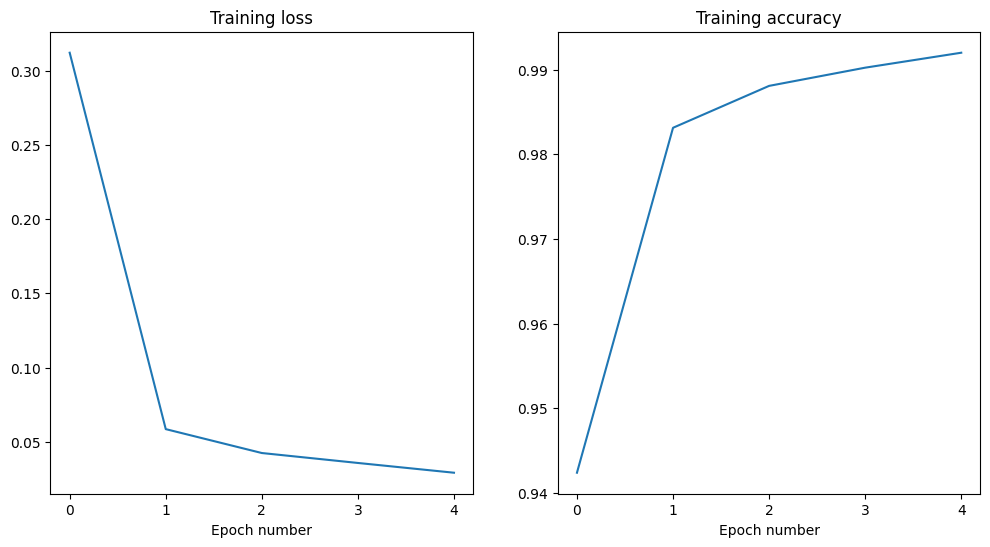

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history
_, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(history_dict['loss'], label='loss')
ax[0].set_title("Training loss")
ax[0].set_xticks([i for i in range(5)])
ax[0].set_xlabel('Epoch number')

ax[1].plot(history_dict['accuracy'], label='accuracy')
ax[1].set_title("Training accuracy")
ax[1].set_xticks([i for i in range(5)])
ax[1].set_xlabel('Epoch number')

plt.show()

## Part 2 - own small dataset

### Network architecture

In [10]:
model2 = models.Sequential()
model2.add(layers.Rescaling(1./255, input_shape=(150, 150, 3)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(74, 74, 32)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(36, 36, 64)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(17, 17, 128)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

# display the architecture
model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from keras import optimizers

opt = optimizers.RMSprop(learning_rate=1e-4)

model2.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Data preprocessing

In [12]:
from keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory="dataset_cats_dogs/train", # this is the target directory
    labels="inferred",
    label_mode="binary", # since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150, 150), # all images have different sizes and will be resized to 150x150
    shuffle=True,
)

val_dataset = image_dataset_from_directory(
    directory="dataset_cats_dogs/validation",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150, 150),
    shuffle=True,
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


### Training

In [13]:
history2 = model2.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5079 - loss: 0.6960 - val_accuracy: 0.5960 - val_loss: 0.6859
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.5562 - loss: 0.6840 - val_accuracy: 0.6180 - val_loss: 0.6679
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6031 - loss: 0.6661 - val_accuracy: 0.6250 - val_loss: 0.6569
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6337 - loss: 0.6512 - val_accuracy: 0.6410 - val_loss: 0.6364
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.6644 - loss: 0.6196 - val_accuracy: 0.6680 - val_loss: 0.6147
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6810 - loss: 0.5909 - val_accuracy: 0.6730 - val_loss: 0.6050
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7205 - loss: 0.5605 - val_accuracy: 0.6760 - val_loss: 0.6043
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7438 - loss: 0.5469 - val_accu

### Plot training & validation loss

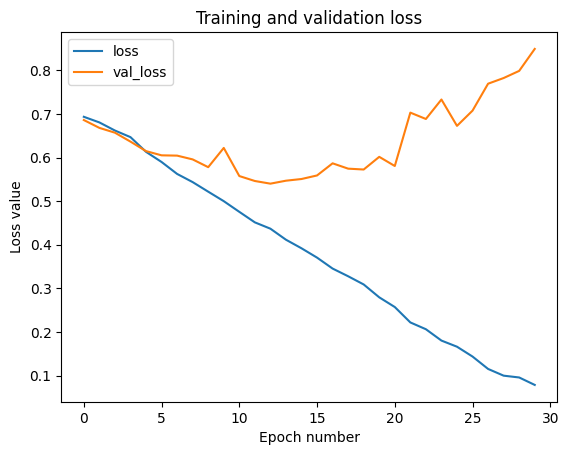

In [14]:
history_dict2 = history2.history

plt.plot(history_dict2['loss'], label='loss')
plt.plot(history_dict2['val_loss'], label='val_loss')

plt.title('Training and validation loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss value')
plt.xticks([5*i for i in range(7)])
plt.legend()
plt.show()

### Plot training & validation accuracy

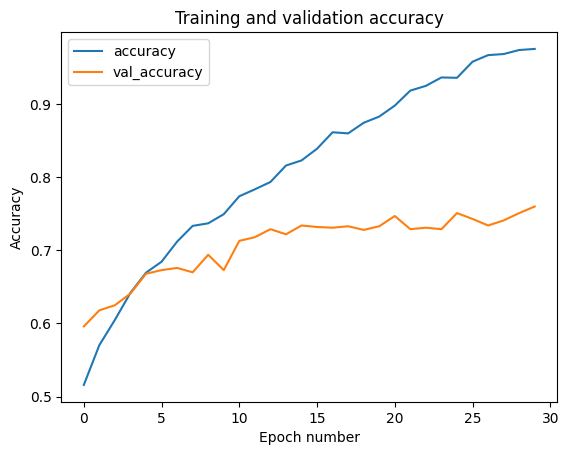

In [15]:
plt.plot(history_dict2['accuracy'], label='accuracy')
plt.plot(history_dict2['val_accuracy'], label='val_accuracy')

plt.title('Training and validation accuracy')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.xticks([5*i for i in range(7)])
plt.legend()
plt.show()